In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'/'CS 247'/'Project'
%ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g6cEUBdNQV_tXWkTk4eeJCWsyivuRRv4U9qNIH_LIcXG7iourZ1CTI
Mounted at /content/drive
/content/drive/My Drive/CS 247/Project
loglizer/  nulog/


#### NULOG testing

In [ ]:
#!git clone https://github.com/nulog/nulog.git
%cd nulog/benchmark
%ls

/content/drive/My Drive/CS 247/Project/nulog/benchmark
AEL_bechmark_result.csv         LogCluster_benchmark.py
AEL_benchmark.py                LogMine_bechmark_result.csv
AttentionParserResult/          LogMine_benchmark.py
Drain_bechmark_result.csv       LogSig_bechmark_result.csv
Drain_benchmark.py              LogSig_benchmark.py
__init__.py                     MoLFI_bechmark_result.csv
IPLoM_benchmark.py              MoLFI_benchmark.py
Lenma_bechmark_result.csv       NuLog_benchmark.py
Lenma_benchmark.py              SHISO_bechmark_result.csv
LFA_bechmark_result.csv         SHISO_benchmark.py
LFA_benchmark.py                SLCT_benchmark.py
LKE_bechmark_result.csv         SLCT_benchmark_result.csv
LKE_benchmark.py                Spell_bechmark_result.csv
LogCluster_bechmark_result.csv  Spell_benchmark.py


In [ ]:
import sys

sys.path.append('../')
from logparser.NuLog import NuLogParser
from logparser.utils import evaluator

import os
import pandas as pd

input_dir = '../logs/'  # The input directory of log file
output_dir = './AttentionParserResult/'  # The output directory of parsing results

benchmark_settings = {

    'HDFS': {
        'log_file': 'HDFS/HDFS_2k.log',
        'log_format': '<Date> <Time> <Pid> <Level> <Component>: <Content>',
        'filters': '(\s+blk_)|(:)|(\s)',
        'k':15,
        'nr_epochs':5,
        'num_samples':0
        },
}



bechmark_result = []
for dataset, setting in benchmark_settings.items():
    print('\n=== Evaluation on %s ===' % dataset)
    indir = os.path.join(input_dir, os.path.dirname(setting['log_file']))
    log_file = os.path.basename(setting['log_file'])

    parser = NuLogParser.LogParser(indir=indir, outdir=output_dir, filters=setting['filters'], k=setting['k'], log_format=setting['log_format'])
    parser.parse(log_file, nr_epochs=setting['nr_epochs'], num_samples=setting['num_samples'])

    accuracy_PA, accuracy_exact_string_matching, edit_distance_result_mean, edit_distance_result_std = evaluator.evaluate(
        groundtruth=os.path.join(indir, log_file + '_structured.csv'),
        parsedresult=os.path.join(output_dir, log_file + '_structured.csv')
    )
    bechmark_result.append([dataset, accuracy_PA, accuracy_exact_string_matching, edit_distance_result_mean, edit_distance_result_std])

print('\n=== Overall evaluation results ===')
df_result = pd.DataFrame(bechmark_result, columns=['Dataset', 'Accuracy_PA', 'Accuracy_ExactMatching','Edit_distance_mean', 'Edit_distance_std'])
#df_result.set_index('Dataset', inplace=True)
print(df_result)

 34%|███▍      | 677/2000 [00:00<00:00, 6766.43it/s]


=== Evaluation on HDFS ===


100%|██████████| 2000/2000 [00:00<00:00, 6395.33it/s]
../logparser/NuLog/NuLogParser.py:671: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(p)


Epoch 0
Epoch Step: 1 / 400 Loss: 7.117794 Tokens per Sec: 468.820160
Epoch Step: 11 / 400 Loss: 3.864518 Tokens per Sec: 2032.273804
Epoch Step: 21 / 400 Loss: 3.550675 Tokens per Sec: 2286.986328
Epoch Step: 31 / 400 Loss: 3.678900 Tokens per Sec: 2239.678223
Epoch Step: 41 / 400 Loss: 3.905738 Tokens per Sec: 2314.943848
Epoch Step: 51 / 400 Loss: 3.967348 Tokens per Sec: 2264.440674
Epoch Step: 61 / 400 Loss: 3.548571 Tokens per Sec: 2261.109619
Epoch Step: 71 / 400 Loss: 3.603955 Tokens per Sec: 2282.740479
Epoch Step: 81 / 400 Loss: 3.409539 Tokens per Sec: 2270.803467
Epoch Step: 91 / 400 Loss: 3.206407 Tokens per Sec: 2224.649414
Epoch Step: 101 / 400 Loss: 3.097749 Tokens per Sec: 2304.071533
Epoch Step: 111 / 400 Loss: 3.180752 Tokens per Sec: 2262.598633
Epoch Step: 121 / 400 Loss: 2.827704 Tokens per Sec: 2274.670166
Epoch Step: 131 / 400 Loss: 2.927329 Tokens per Sec: 2265.698975
Epoch Step: 141 / 400 Loss: 2.809500 Tokens per Sec: 2280.685791
Epoch Step: 151 / 400 Loss: 2

In [ ]:
!python NuLog_benchmark.py

Streaming output truncated to the last 5000 lines.
Epoch Step: 731 / 1000 Loss: 1.039448 Tokens per Sec: 2226.154053
Epoch Step: 741 / 1000 Loss: 1.152531 Tokens per Sec: 2217.747803
Epoch Step: 751 / 1000 Loss: 0.787379 Tokens per Sec: 2249.480957
Epoch Step: 761 / 1000 Loss: 0.748496 Tokens per Sec: 2215.463623
Epoch Step: 771 / 1000 Loss: 1.768456 Tokens per Sec: 2262.199707
Epoch Step: 781 / 1000 Loss: 1.266140 Tokens per Sec: 2196.817871
Epoch Step: 791 / 1000 Loss: 2.150515 Tokens per Sec: 2213.958252
Epoch Step: 801 / 1000 Loss: 1.268951 Tokens per Sec: 2197.825439
Epoch Step: 811 / 1000 Loss: 1.616490 Tokens per Sec: 2235.588867
Epoch Step: 821 / 1000 Loss: 1.328907 Tokens per Sec: 2220.586914
Epoch Step: 831 / 1000 Loss: 1.073860 Tokens per Sec: 2177.509521
Epoch Step: 841 / 1000 Loss: 0.992458 Tokens per Sec: 2167.125977
Epoch Step: 851 / 1000 Loss: 0.696132 Tokens per Sec: 2236.479736
Epoch Step: 861 / 1000 Loss: 1.577737 Tokens per Sec: 2224.340820
Epoch Step: 871 / 1000 Lo

In [ ]:
%cd loglizer

/content/drive/My Drive/CS 247/Project/loglizer


#### Loglizer readins

In [ ]:
run_models = ['PCA', 'InvariantsMiner', 'LogClustering', 'IsolationForest', 'LR', 
              'SVM', 'DecisionTree']

In [ ]:
%cd nulog
%ls

/content/drive/My Drive/CS 247/Project/nulog
benchmark/  docs/        LICENSE     logs/      requirements.txt  use_cases/
demo/       __init__.py  logparser/  README.md  test/


In [ ]:
#%cd /content/drive/'My Drive'/'CS 247'/'Project'
#!git clone https://github.com/logpai/loglizer.git
#%cd loglizer
#!pip install -r requirements.txt

/content/drive/My Drive/CS 247/Project/loglizer


In [ ]:
# import necessary libraries

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import trange 
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sb
import networkx as nx
import numpy as np
from scipy.linalg import sqrtm 
from numpy import linalg as LA
from logparser.NuLog import NuLogParser
from logparser.utils import evaluator
from tqdm import trange 

filters = '(\s+blk_)|(:)|(\s)'
log_format = '<Date> <Time> <Pid> <Level> <Component>: <Content>'

# parser = NuLogParser.LogParser(indir='logs/', outdir=None, filters=filters, k=15, log_format=log_format)
# parser.logName = 'HDFS/HDFS_2k.log'
# parser.mask_percentage = 1
# parser.pad_len = 150
# parser.num_samples = 0
# parser.batch_size = 5

parser = NuLogParser.LogParser(indir='logs/', outdir=None, filters=filters, k=15, log_format=log_format)
parser.logName = 'HDFS/HDFS_2k.log'
parser.mask_percentage = 1
parser.pad_len = 150
parser.num_samples = 0
parser.batch_size = 5
parser.step_size=10

parser.load_data()

df_len = parser.df_log.shape[0]
data_tokenized = []

for i in trange(0, df_len):
  tokenized = parser.tokenizer.tokenize('<CLS> ' + parser.df_log.iloc[i].Content)
  data_tokenized.append(tokenized)
/
train_dataloader, test_dataloader = parser.get_dataloaders(data_tokenized)
criterion = nn.CrossEntropyLoss()
model = parser.make_model(parser.tokenizer.n_words, parser.tokenizer.n_words, N=1, d_model=256, d_ff=256,
                                dropout=0.1, max_len=150)
model.cuda()
model_opt = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=0.005)

for epoch in range(5):
  model.train()
  print("Epoch", epoch)
  parser.run_epoch(train_dataloader, model, SimpleLossCompute(model.generator, criterion, model_opt))

100%|██████████| 2000/2000 [00:00<00:00, 3769.34it/s]
/content/drive/My Drive/CS 247/Project/nulog/logparser/NuLog/NuLogParser.py:671: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(p)


Epoch 0
Epoch Step: 1 / 400 Loss: 7.128345 Tokens per Sec: 1990.081299
Epoch Step: 11 / 400 Loss: 4.207850 Tokens per Sec: 2106.392090
Epoch Step: 21 / 400 Loss: 3.526587 Tokens per Sec: 2258.172363
Epoch Step: 31 / 400 Loss: 3.516159 Tokens per Sec: 2164.906494
Epoch Step: 41 / 400 Loss: 3.514543 Tokens per Sec: 2402.499756
Epoch Step: 51 / 400 Loss: 3.293060 Tokens per Sec: 2187.998291
Epoch Step: 61 / 400 Loss: 3.831567 Tokens per Sec: 2282.034668
Epoch Step: 71 / 400 Loss: 3.225382 Tokens per Sec: 2247.920410
Epoch Step: 81 / 400 Loss: 3.282794 Tokens per Sec: 2333.382324
Epoch Step: 91 / 400 Loss: 3.124094 Tokens per Sec: 2376.494385
Epoch Step: 101 / 400 Loss: 3.234235 Tokens per Sec: 2365.308838
Epoch Step: 111 / 400 Loss: 2.625373 Tokens per Sec: 2308.339600
Epoch Step: 121 / 400 Loss: 2.799823 Tokens per Sec: 2335.856934
Epoch Step: 131 / 400 Loss: 2.773550 Tokens per Sec: 2235.403809
Epoch Step: 141 / 400 Loss: 2.757038 Tokens per Sec: 2363.442139
Epoch Step: 151 / 400 Loss: 

In [ ]:
final = 0
for i, batch in enumerate(train_dataloader):
  b_input, b_labels, _ = parser.do_mask(batch)
  #batch = Batch(b_input, b_labels, 0)
  final += b_input.shape[0]
  #out = model.forward(batch.src.cuda(), batch.trg.cuda(),
                    #batch.src_mask.cuda(), batch.trg_mask.cuda())
  #out[:, 0, :]

In [ ]:
def get_dataloaders(self, data_tokenized):
        transform_to_tensor = transforms.Lambda(lambda lst: torch.tensor(lst))

        train_data = MaskedDataset(data_tokenized, self.tokenizer, mask_percentage=self.mask_percentage, transforms=transform_to_tensor, pad_len=self.pad_len)
        weights = train_data.get_sample_weights()
        if self.num_samples != 0:
            train_sampler = WeightedRandomSampler(weights=list(weights), num_samples=self.num_samples, replacement=True)
        if self.num_samples == 0:
            train_sampler = RandomSampler(train_data)
        train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=self.batch_size)

        test_data = MaskedDataset(data_tokenized, self.tokenizer, mask_percentage=self.mask_percentage, transforms=transform_to_tensor, pad_len=self.pad_len)
        test_sampler = SequentialSampler(test_data)
        test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=self.batch_size)
        return train_dataloader, test_dataloader

In [ ]:
sum(1 for batch in train_dataloader)

400

In [ ]:
%cd loglizer

/content/drive/My Drive/CS 247/Project/loglizer/loglizer


In [ ]:
from loglizer import dataloader
from loglizer.models import DeepLog
from loglizer import preprocessing
from loglizer.preprocessing import Vectorizer, Iterator


ModuleNotFoundError: ignored

In [ ]:
batch_size = 32
hidden_size = 32
num_directions = 2
topk = 5
train_ratio = 0.2
window_size = 10
epoches = 2
num_workers = 2
device = 2 

In [ ]:
#struct_log = '../MyData/' # The structured log file
#label_file = '../MyData/anomaly_label.csv' # The anomaly label file
curr_path = "/content/drive/My Drive/CS 247/Project/loglizer"
#struct_log = '/content/drive/MyDrive/CS 247/Project/loglizer/data/HDFS/HDFS.npz'
struct_log = '/content/drive/MyDrive/CS 247/Project/loglizer/data/HDFS/HDFS_100k.log_structured.csv'
label_file = '/content/drive/MyDrive/CS 247/Project/loglizer/data/HDFS/anomaly_label.csv' # The anomaly label file

In [ ]:
DATA = []
DATA.append(dataloader.load_HDFS(struct_log,
                                                           window='session', 
                                                           train_ratio=0.8,
                                                           split_type='uniform'))


====== Input data summary ======
Loading /content/drive/MyDrive/CS 247/Project/loglizer/data/HDFS/HDFS_100k.log_structured.csv
Total: 7940 instances, train: 6352 instances, test: 1588 instances


In [ ]:
DATA[0][0][0]

IndexError: ignored

### N-gram baseline

In [ ]:
class N_gram(object):

  def __init__(self, x_train, x_test, n = 3):
    self.vocab = {}
    self.ngram_counts = {}
    #ids = set(x_train.SessionId)
    #for id in ids:
    for i,seq in enumerate(x_train.EventSequence):
      m = len(seq)
      for j in range(m - n + 1):
        curr_ngram = seq[j:(j+n)]
        curr_ngram_str = ''.join(curr_ngram)
        if curr_ngram_str not in self.vocab:
          self.vocab[curr_ngram_str] = 1
        else:
          self.vocab[curr_ngram_str] += 1
        if y_train[i] == 0:
          count = np.array([1, 0])
        else:
          count = np.array([0, 1])
        prior_ngram_str = ''.join(curr_ngram[:-1])
        if prior_ngram_str not in self.ngram_counts:
          self.ngram_counts[prior_ngram_str] = count
        else:
          self.ngram_counts[prior_ngram_str] += count
  
  def eval(self, x_test, y_test):
    preds = []
    for i, seq in enumerate(x_test.EventSequence):
      m = len(seq)
      seq_log_prob = np.zeros(2)
      for j in range(m - n + 1):
        curr_ngram = seq[j:(j+n)]
        curr_ngram_str = ''.join(curr_ngram)
        denom = self.vocab.get(curr_ngram_str, 0)
        if denom == 0:
          seq_log_prob += np.log(0.5)
        else:
          prior_ngram_str = ''.join(curr_ngram[:-1])
          num = self.ngram_counts.get(prior_ngram_str, np.zeros(2))
          #print(i, prior_ngram_str, num)
          seq_log_prob += np.log(np.array(num) / denom)
      preds.append(np.argmax(seq_log_prob))
    
    preds = np.array(preds)
    for sess in x_test.SessionId:
      inds = x_test[x_test.SessionId == 11].index.tolist()
      preds[inds[0]:inds[1]] = np.round(np.mean(preds[inds[0]:inds[1]])).astype(int)
    
    print("acc = ", np.mean(preds == y_test))
    return preds

      






In [ ]:
#(x_train, y_train), (x_test, y_test), data_df = DATA[0]
trigram = N_gram(x_train, y_train, 3)
trigram.eval(x_test, y_test)

AttributeError: ignored

In [ ]:
all_pred = np.zeros(y_test.shape)
for i in range(1, 9):
  ngram = N_gram(x_train, x_test, i)
  pred = ngram.eval(x_test, y_test)
  all_pred += pred

all_pred /= 8
print("acc = ", np.mean(all_pred == y_test))


acc =  0.967373193319642
acc =  0.967373193319642


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log


acc =  0.21951408532568684
acc =  0.967373193319642
acc =  0.967373193319642
acc =  0.967373193319642
acc =  0.967373193319642
acc =  0.967373193319642
acc =  0.19777579726430813


### Loglizer base models

In [ ]:
from loglizer.models import *
from loglizer import dataloader, preprocessing

In [ ]:
(x_tr, y_train), (x_te, y_test), data_df = dataloader.load_HDFS(struct_log,
                                                           window='session', 
                                                           train_ratio=0.5,
                                                           split_type='uniform')
benchmark_results = []
for _model in run_models:
  print('Evaluating {} on HDFS:'.format(_model))
  if _model == 'PCA':
      feature_extractor = preprocessing.FeatureExtractor()
      x_train = feature_extractor.fit_transform(x_tr, term_weighting='tf-idf', 
                                                normalization='zero-mean')
      model = PCA()
      model.fit(x_train)

  elif _model == 'InvariantsMiner':
      feature_extractor = preprocessing.FeatureExtractor()
      x_train = feature_extractor.fit_transform(x_tr)
      model = InvariantsMiner(epsilon=0.5)
      model.fit(x_train)

  elif _model == 'LogClustering':
      feature_extractor = preprocessing.FeatureExtractor()
      x_train = feature_extractor.fit_transform(x_tr, term_weighting='tf-idf')
      model = LogClustering(max_dist=0.3, anomaly_threshold=0.3)
      model.fit(x_train[y_train == 0, :]) # Use only normal samples for training

  elif _model == 'IsolationForest':
      feature_extractor = preprocessing.FeatureExtractor()
      x_train = feature_extractor.fit_transform(x_tr)
      model = IsolationForest(random_state=2019, max_samples=0.9999, contamination=0.03, 
                              n_jobs=4)
      model.fit(x_train)

  elif _model == 'LR':
      feature_extractor = preprocessing.FeatureExtractor()
      x_train = feature_extractor.fit_transform(x_tr, term_weighting='tf-idf')
      model = LR()
      model.fit(x_train, y_train)

  elif _model == 'SVM':
      feature_extractor = preprocessing.FeatureExtractor()
      x_train = feature_extractor.fit_transform(x_tr, term_weighting='tf-idf')
      model = SVM()
      model.fit(x_train, y_train)

  elif _model == 'DecisionTree':
      feature_extractor = preprocessing.FeatureExtractor()
      x_train = feature_extractor.fit_transform(x_tr, term_weighting='tf-idf')
      model = DecisionTree()
      model.fit(x_train, y_train)

  x_test = feature_extractor.transform(x_te)
  print('Train accuracy:')
  precision, recall, f1 = model.evaluate(x_train, y_train)
  benchmark_results.append([_model + '-train', precision, recall, f1])
  print('Test accuracy:')
  precision, recall, f1 = model.evaluate(x_test, y_test)
  benchmark_results.append([_model + '-test', precision, recall, f1])

  pd.DataFrame(benchmark_results, columns=['Model', 'Precision', 'Recall', 'F1']) #\
  #.to_csv('benchmark_result.csv', index=False)

====== Input data summary ======
Loading /content/drive/MyDrive/CS 247/Project/loglizer/data/HDFS/HDFS_100k.log_structured.csv
Total: 7940 instances, train: 3970 instances, test: 3970 instances
Evaluating PCA on HDFS:
====== Transformed train data summary ======
Train data shape: 3970-by-14

====== Model summary ======
n_components: 1
Project matrix shape: 14-by-14
SPE threshold: 14.862112341059719

====== Transformed test data summary ======
Test data shape: 3970-by-14

Train accuracy:
====== Evaluation summary ======


ValueError: ignored

In [ ]:
for epoch in [2,5, 10,100]:
  (x_train, window_y_train, y_train), (x_test, window_y_test, y_test) = dataloader.load_HDFS(struct_log, label_file=label_file, window='session', window_size=window_size, train_ratio=train_ratio, split_type='uniform')
    
  feature_extractor = Vectorizer()
  train_dataset = feature_extractor.fit_transform(x_train, window_y_train, y_train)
  test_dataset = feature_extractor.transform(x_test, window_y_test, y_test)

  train_loader = Iterator(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers).iter
  test_loader = Iterator(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers).iter

  model = DeepLog(num_labels=feature_extractor.num_labels, hidden_size=hidden_size, num_directions=2, topk=topk, device=device)
  model.fit(train_loader, epoch)
  print("========")
  print(f"epoch = {epoch}")
  print('Train validation:')
  metrics = model.evaluate(train_loader)

  print('Test validation:')
  metrics = model.evaluate(test_loader)

====== Input data summary ======
Loading /content/drive/MyDrive/CS 247/Project/loglizer/data/HDFS/HDFS_100k.log_structured.csv
62 251
Slicing 1587 sessions, with window 10
Slicing done, 8406 windows generated
Slicing 6353 sessions, with window 10
Slicing done, 25807 windows generated
Train: 8406 windows (464/8406 anomaly), 7942/8406 normal
Test: 25807 windows (842/25807 anomaly), 24965/25807 normal
Epoch 1/2, training loss: 2.49930
Epoch 2/2, training loss: 2.32946
epoch = 2
Train validation:
[('window_acc', 0.50809), ('session_acc', 0.78513), ('f1', 0.10026), ('recall', 0.30645), ('precision', 0.05994)]
Test validation:
[('window_acc', 0.1741), ('session_acc', 0.09586), ('f1', 0.04394), ('recall', 0.5259), ('precision', 0.02293)]
====== Input data summary ======
Loading /content/drive/MyDrive/CS 247/Project/loglizer/data/HDFS/HDFS_100k.log_structured.csv
62 251
Slicing 1587 sessions, with window 10
Slicing done, 8406 windows generated
Slicing 6353 sessions, with window 10
Slicing done

In [ ]:
for batch_size in [32,64,128,256,512,1024]:
  (x_train, window_y_train, y_train), (x_test, window_y_test, y_test) = dataloader.load_HDFS(struct_log, label_file=label_file, window='session', window_size=window_size, train_ratio=train_ratio, split_type='uniform')
    
  feature_extractor = Vectorizer()
  train_dataset = feature_extractor.fit_transform(x_train, window_y_train, y_train)
  test_dataset = feature_extractor.transform(x_test, window_y_test, y_test)

  train_loader = Iterator(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers).iter
  test_loader = Iterator(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers).iter

  model = DeepLog(num_labels=feature_extractor.num_labels, hidden_size=hidden_size, num_directions=2, topk=topk, device=device)
  model.fit(train_loader, epoches)
  print("========")
  print(f"batch_size = {batch_size}")
  print('Train validation:')
  metrics = model.evaluate(train_loader)

  print('Test validation:')
  metrics = model.evaluate(test_loader)

### N-gram (nltk)

In [ ]:
from itertools import product
import math
import nltk

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
fake_df = pd.DataFrame({"zip_code": np.repeat(["243x2", "2899.8", "5551?", "03754", "14234"], 2)})
fake_df

,zip_code
0,243x2
1,243x2
2,2899.8
3,2899.8
4,5551?
5,5551?
6,03754
7,03754
8,14234
9,14234


In [ ]:
x_train["EventSequence"].values

array([list(['E5', 'E5', 'E5', 'E22', 'E11', 'E9', 'E11', 'E9', 'E11', 'E9']),
       list(['E5', 'E5', 'E22', 'E11', 'E9', 'E11', 'E9', 'E11', 'E9', 'E26']),
       list(['E5', 'E22', 'E11', 'E9', 'E11', 'E9', 'E11', 'E9', 'E26', 'E26']),
       ...,
       list(['E5', 'E5', 'E11', 'E9', 'E11', 'E9', 'E26', 'E26', 'E11', 'E9']),
       list(['E5', 'E11', 'E9', 'E11', 'E9', 'E26', 'E26', 'E11', 'E9', 'E26']),
       list(['E11', 'E9', 'E11', 'E9', 'E26', 'E26', 'E11', 'E9', 'E26', 'E2'])],
      dtype=object)

In [ ]:
from itertools import groupby

def get_pattern(value):
    pattern = ''
    value = list(str(value))
    for c in value:
        if c.isnumeric():
            pattern += 'd'
        elif c.isalpha():
            pattern += 'l'
        else:
            pattern += 's'
    
    grouped_pattern = [''.join(g) for _, g in groupby(pattern)]
    
    return ''.join([f'{v[0]}({len(v)})' for v in grouped_pattern])

zip_codes = fake_df['zip_code'].values
zip_codes_pattern = [get_pattern(zc) for zc in zip_codes]
zip_codes_pattern

['d(3)l(1)d(1)',
 'd(3)l(1)d(1)',
 'd(4)s(1)d(1)',
 'd(4)s(1)d(1)',
 'd(4)s(1)',
 'd(4)s(1)',
 'd(5)',
 'd(5)',
 'd(5)',
 'd(5)']

In [ ]:
#!pip install "nltk==3.6.2"

     |████████████████████████████████| 1.5MB 6.5MB/s 
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
x_train

,SessionId,EventSequence
0,0,"[E5, E5, E5, E22, E11, E9, E11, E9, E11, E9]"
1,0,"[E5, E5, E22, E11, E9, E11, E9, E11, E9, E26]"
2,0,"[E5, E22, E11, E9, E11, E9, E11, E9, E26, E26]"
3,0,"[E22, E11, E9, E11, E9, E11, E9, E26, E26, E26]"
4,0,"[E11, E9, E11, E9, E11, E9, E26, E26, E26, E2]"
...,...,...
8401,1586,"[E5, E22, E5, E5, E11, E9, E11, E9, E26, E26]"
8402,1586,"[E22, E5, E5, E11, E9, E11, E9, E26, E26, E11]"
8403,1586,"[E5, E5, E11, E9, E11, E9, E26, E26, E11, E9]"
8404,1586,"[E5, E11, E9, E11, E9, E26, E26, E11, E9, E26]"


In [ ]:
#x_train
#token= x_train.EventSequence[0]
list(zip(*[token[i:] for i in range(3)]))

[('E5', 'E5', 'E5'),
 ('E5', 'E5', 'E22'),
 ('E5', 'E22', 'E11'),
 ('E22', 'E11', 'E9'),
 ('E11', 'E9', 'E11'),
 ('E9', 'E11', 'E9'),
 ('E11', 'E9', 'E11'),
 ('E9', 'E11', 'E9'),
 ('E5', 'E5', 'E5'),
 ('E5', 'E5', 'E22'),
 ('E5', 'E22', 'E11'),
 ('E22', 'E11', 'E9'),
 ('E11', 'E9', 'E11'),
 ('E9', 'E11', 'E9'),
 ('E11', 'E9', 'E11'),
 ('E9', 'E11', 'E9')]

In [ ]:
def ngram_preprocess(x_train, n):
  All_Sess = set(x_train.SessionId)
  Sess_ngrams = []
  for id in All_Sess:
    Sess_ngrams.append(list(zip(*[token[i:] for i in range(3)])))
  pad_seqs_pttrn = [pad_both_ends(seq_p, n) for seq_p in All_pattrns]
  

In [ ]:
def get_pattern(sess_seqs):
  return [''.join(seq) for seq in sess_seqs]

def ngram_preprocess(x_train, n):
  All_Sess = set(x_train.SessionId)
  All_pattrns = []
  for id in All_Sess:
    All_seqs = x_train[x_train.SessionId == id].EventSequence.values
    seq_pttrn = get_pattern(All_seqs)
    All_pattrns += seq_pttrn

  pad_seqs_pttrn = [pad_both_ends(seq_p, n) for seq_p in All_pattrns]
  my_ngrams = [ngrams(psp, n=n) for psp in pad_seqs_pttrn]
  processed_d = {"tokens": my_ngrams}
  return processed_d


In [ ]:
def get_pattern(sess_seqs):
  return [''.join(seq) for seq in sess_seqs]

def ngram_preprocess(x_train, n):
  All_Sess = set(x_train.SessionId)
  All_pattrns = []
  for id in All_Sess:
    All_seqs = x_train[x_train.SessionId == id].EventSequence.values
    seq_pttrn = get_pattern(All_seqs)
    All_pattrns += seq_pttrn

  pad_seqs_pttrn = [pad_both_ends(seq_p, n) for seq_p in All_pattrns]
  my_ngrams = [ngrams(psp, n=n) for psp in pad_seqs_pttrn]
  vocab = list(flatten(pad_both_ends(seq_p, n=n-1) for seq_p in All_pattrns))
  processed_d = {"ngram": my_ngrams, "vocab": vocab}
  return processed_d


class N_GramModel(object):
   def __init__(self, train_data, n, laplace=1):
        self.n = n
        self.laplace = laplace
        self.prcs_dict = ngram_preprocess(train_data, n)
        self.tokens = self.prcs_dict["tokens"]
        self.vocab  = nltk.FreqDist(self.tokens)
        self.model  = self._create_model()
        self.masks  = list(reversed(list(product((0,1), repeat=n))))

  def _smooth(self):
        """Apply Laplace smoothing to n-gram frequency distribution.
        
        Here, n_grams refers to the n-grams of the tokens in the training corpus,
        while m_grams refers to the first (n-1) tokens of each n-gram.
        Returns:
            dict: Mapping of each n-gram (tuple of str) to its Laplace-smoothed 
            probability (float).
        """
        vocab_size = len(self.vocab)

        n_grams = nltk.ngrams(self.tokens, self.n)
        n_vocab = nltk.FreqDist(n_grams)

        m_grams = nltk.ngrams(self.tokens, self.n-1)
        m_vocab = nltk.FreqDist(m_grams)

        def smoothed_count(n_gram, n_count):
            m_gram = n_gram[:-1]
            m_count = m_vocab[m_gram]
            return (n_count + self.laplace) / (m_count + self.laplace * vocab_size)

        return { n_gram: smoothed_count(n_gram, count) for n_gram, count in n_vocab.items() }

    def _create_model(self):
        """Create a probability distribution for the vocabulary of the training corpus.
        
        If building a unigram model, the probabilities are simple relative frequencies
        of each token with the entire corpus.
        Otherwise, the probabilities are Laplace-smoothed relative frequencies.
        Returns:
            A dict mapping each n-gram (tuple of str) to its probability (float).
        """
        if self.n == 1:
            num_tokens = len(self.tokens)
            return { (unigram,): count / num_tokens for unigram, count in self.vocab.items() }
        else:
            return self._smooth()

    def _convert_oov(self, ngram):
        """Convert, if necessary, a given n-gram to one which is known by the model.
        Starting with the unmodified ngram, check each possible permutation of the n-gram
        with each index of the n-gram containing either the original token or <UNK>. Stop
        when the model contains an entry for that permutation.
        This is achieved by creating a 'bitmask' for the n-gram tuple, and swapping out
        each flagged token for <UNK>. Thus, in the worst case, this function checks 2^n
        possible n-grams before returning.
        Returns:
            The n-gram with <UNK> tokens in certain positions such that the model
            contains an entry for it.
        """
        mask = lambda ngram, bitmask: tuple((token if flag == 1 else "<UNK>" for token,flag in zip(ngram, bitmask)))

        ngram = (ngram,) if type(ngram) is str else ngram
        for possible_known in [mask(ngram, bitmask) for bitmask in self.masks]:
            if possible_known in self.model:
                return possible_known


### Log_clustering

In [ ]:
from loglizer.models import *
from loglizer import dataloader, preprocessing

ModuleNotFoundError: ignored

In [ ]:
(X_train, y_train), (X_test, y_test), df = dataloader.load_HDFS(struct_log,
                                                            label_file=label_file,
                                                            window='session', 
                                                            train_ratio=train_ratio,
                                                            split_type='uniform')

====== Input data summary ======
Loading /content/drive/MyDrive/CS 247/Project/loglizer/data/HDFS/HDFS_100k.log_structured.csv
62 251
Total: 7940 instances, 313 anomaly, 7627 normal
Train: 1587 instances, 62 anomaly, 1525 normal
Test: 6353 instances, 251 anomaly, 6102 normal



ValueError: ignored

In [ ]:
train_n = int(train_ratio * len(df))

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_inds = np.random.choice(np.arange(len(df)), train_n, replace = False)

In [ ]:
traindf = df.iloc[train_inds]
test_inds = np.array(list(set(np.arange(len(df))).difference(train_inds)))
test_inds.shape[0] + traindf.shape[0] == df.shape[0]

True

In [ ]:
testdf = df.iloc[test_inds]

In [ ]:
traindf.head()

,BlockId,EventSequence,Label
3336,blk_-444383372186501686,"[E22, E5, E5, E5, E26, E11, E9, E11, E9, E26, ...",0
4125,blk_-8461830959047010307,"[E22, E5, E5, E5, E26, E26, E26, E11, E9, E11,...",0
3861,blk_8009320766684557243,"[E22, E5, E5, E5, E26, E26, E11, E11, E9, E9, ...",0
5671,blk_6054716446524239011,"[E22, E5, E5, E5, E26, E26, E26, E11, E9, E11,...",0
7788,blk_-3885243975494636578,"[E22, E5, E5, E5, E26, E26, E26, E11, E9, E11,...",0


In [ ]:
traindf.BlockId.drop_duplicates().shape

(1588,)

In [ ]:
X_train = traindf.iloc[:, 1]
y_train = traindf.iloc[:, 2]
X_test = testdf.iloc[:, 1]
y_test = testdf.iloc[:, 2]

In [ ]:
max_dist = 0.3 # the threshold to stop the clustering process
anomaly_threshold = 0.3 # the threshold for anomaly detection
train_ratio = 0.2

(X_train, y_train), (X_test, y_test) = dataloader.load_HDFS(struct_log,
                                                            label_file=label_file,
                                                            window='session', 
                                                            train_ratio=train_ratio,
                                                            split_type='uniform')
feature_extractor = preprocessing.FeatureExtractor()
x_train = feature_extractor.fit_transform(X_train, term_weighting='tf-idf')
x_test = feature_extractor.transform(X_test)

model = LogClustering(max_dist=max_dist, anomaly_threshold=anomaly_threshold)
model.fit(x_train[y_train == 0, :]) # Use only normal samples for training

print('Train validation:')
precision, recall, f1 = model.evaluate(x_train, y_train)

print('Test validation:')
precision, recall, f1 = model.evaluate(x_test, y_test)

====== Input data summary ======
Loading /content/drive/MyDrive/CS 247/Project/loglizer/data/HDFS/HDFS_100k.log_structured.csv
62 251
Total: 7940 instances, 313 anomaly, 7627 normal
Train: 1587 instances, 62 anomaly, 1525 normal
Test: 6353 instances, 251 anomaly, 6102 normal

====== Transformed train data summary ======
Train data shape: 1587-by-14

====== Transformed test data summary ======
Test data shape: 6353-by-14

====== Model summary ======
Starting offline clustering...
Processed 1000 instances.
Found 3 clusters offline.

Starting online clustering...
Processed 1525 instances.
Found 3 clusters online.

Train validation:
====== Evaluation summary ======
Precision: 1.000, recall: 0.081, F1-measure: 0.149

Test validation:
====== Evaluation summary ======
Precision: 0.979, recall: 0.554, F1-measure: 0.707



In [ ]:
model.representatives

[array([-7.55862040e-12, -2.51954013e-12,  4.18629145e-02,  4.26294917e-02,
         4.26294917e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]),
 array([-7.55862040e-12, -2.51954013e-12,  4.18629145e-02,  4.26294917e-02,
         4.26294917e-02,  1.80260280e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]),
 array([-1.63770109e-11, -2.51954013e-12,  4.18629145e-02,  4.26294917e-02,
         9.23638987e-02,  1.14186227e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.90019430e+01,  1.65725389e+01,  1.65725389e+01,
         1.65725389e+01,  7.33141030e+02])]

### Embedding based on event as word

In [ ]:
%cd loglizer

/content/drive/My Drive/CS 247/Project/loglizer/loglizer


In [ ]:
from loglizer.models import *
from loglizer import dataloader, preprocessing

In [ ]:
#No session
(X_train, y_train), (X_test, y_test), data_df = dataloader.load_HDFS(struct_log,
                                                                label_file=label_file,
                                                                window='session', 
                                                                train_ratio=0.5,
                                                                split_type='uniform')

====== Input data summary ======
Loading /content/drive/MyDrive/CS 247/Project/loglizer/data/HDFS/HDFS_100k.log_structured.csv
156 157
Total: 7940 instances, 313 anomaly, 7627 normal
Train: 3969 instances, 156 anomaly, 3813 normal
Test: 3971 instances, 157 anomaly, 3814 normal



In [ ]:
X_train.shape[0] + X_test.shape[0]

7940

In [ ]:
max_dist = 0.3 # the threshold to stop the clustering process
anomaly_threshold = 0.3 # the threshold for anomaly detection
train_ratio = 0.5

#### Add tokens?

In [ ]:
# extremely long / short seq -> system error
anomaly_inds = []
for i,seq in enumerate(X_train.EventSequence):
  if len(seq) > 16 or len(seq) < 10:
    anomaly_inds.append(i)
    print(i, len(seq), y_train[i])


In [ ]:
inds = list(range(len(X_train)))
inds.remove(3175)
inds.remove(3249)
3175 in inds or 3249 in inds

False

In [ ]:
X_train_new = X_train[inds]

In [ ]:
#add <CLS >
for i,seq in enumerate(X_train_new):
  miss = 16 - len(seq)
  seq = ["STRT"] + seq + miss * ['PAD'] 
  X_train_new[i] = seq


In [ ]:
for seq in X_train_new:
  if len(seq) != 17:
    print("error")

In [ ]:
X_train_new[:5]

array([list(['STRT', 'E22', 'E5', 'E5', 'E5', 'E9', 'E26', 'E11', 'E9', 'E11', 'E11', 'E9', 'E26', 'E26', 'PAD', 'PAD', 'PAD']),
       list(['STRT', 'E5', 'E5', 'E22', 'E5', 'E11', 'E9', 'E11', 'E9', 'E26', 'E26', 'E11', 'E9', 'E26', 'PAD', 'PAD', 'PAD']),
       list(['STRT', 'E5', 'E5', 'E5', 'E22', 'E11', 'E9', 'E11', 'E9', 'E26', 'E11', 'E9', 'E26', 'E26', 'PAD', 'PAD', 'PAD']),
       list(['STRT', 'E5', 'E5', 'E22', 'E5', 'E26', 'E26', 'E11', 'E9', 'E11', 'E9', 'E11', 'E9', 'E26', 'PAD', 'PAD', 'PAD']),
       list(['STRT', 'E5', 'E5', 'E22', 'E5', 'E26', 'E11', 'E9', 'E11', 'E9', 'E11', 'E9', 'E26', 'E26', 'PAD', 'PAD', 'PAD'])],
      dtype=object)

#### Model

In [ ]:
# import necessary libraries

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import trange 
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sb
import networkx as nx
import numpy as np
from scipy.linalg import sqrtm 
from numpy import linalg as LA

In [ ]:
class Embedding(nn.Module):
    def __init__(self, size, embed_dim=8):
        super(Embedding, self).__init__()

        self.embed_dim = embed_dim
        self.nodes_embeddings = nn.Embedding(size, embed_dim)

        # Initialization
        self.nodes_embeddings.weight.data = self.nodes_embeddings.weight.data.uniform_(-.5, .5) / embed_dim

    def loss(self, v_i, v_j, negsamples):
        
        v_i = self.nodes_embeddings(v_i) 
        v_j = self.nodes_embeddings(v_j) 
        negsamples = -1 * self.nodes_embeddings(negsamples)
        pos_pair_loss = torch.mul(v_i, v_j) 
        pos_pair_loss = F.logsigmoid(torch.sum(pos_pair_loss, dim=1)) 

        neg_pair_loss = torch.mul(v_i.view(-1, 1, self.embed_dim), negsamples)
        neg_pair_loss = torch.sum(neg_pair_loss, dim=2) 
        neg_pair_loss = torch.sum(F.logsigmoid(neg_pair_loss),dim=1) 
        
        contrastive_loss = pos_pair_loss + neg_pair_loss 

        return torch.mean(contrastive_loss) * -1
        

In [ ]:
#     generating batches of data.

def makeData(samplededges, negsamplesize, degree):
    sampledNodes = set()
    nodesProb = []
    sumofDegree = 0
    for e in samplededges:
        sampledNodes.add(e[0])
        sampledNodes.add(e[1])
    sampledNodes = list(sampledNodes)
    nodesProb = [pow(degree[v],3/4) for v in sampledNodes]
    sumofDegree = sum(nodesProb)
    nodesProb[:] = [x/sumofDegree for x in nodesProb]

    for e in samplededges:
        sourcenode, targetnode = e[0], e[1]
        negnodes = []
        negsamples = 0
        while negsamples < negsamplesize:
            samplednode = np.random.choice(sampledNodes, p = nodesProb)
            
            if (samplednode == sourcenode) or (samplednode == targetnode):
                continue
            else:
                negsamples += 1
                negnodes += [samplednode]
        yield [e[0], e[1]] + negnodes

        


In [ ]:
def get_degree(X_train, window_size):
  nodes = set()
  nodes_d = {}
  for seq in X_train:
    if window_size == 1:
      for event in seq:
        nodes.add(event)
        nodes_d[event] = nodes_d.get(event, 0) + 1
    else:
      m = len(seq)
      for i in range(m+1 - window_size):
        event = tuple(seq[i:i+window_size])
        nodes.add(event)
        nodes_d[event] = nodes_d.get(event, 0) + 1
  return nodes_d 

def create_edges(samples):
  edges = []
  for seq in samples:
    m = len(seq)
    for i in range(m-1):
      edges.append([seq[i], seq[i+1]])
  return edges

#### Train

In [ ]:
n_epochs = 100
neg_size = 3
n_batches = 3
batch_size = 10
degree = get_degree(X_train, window_size= 1)

NameError: ignored

In [ ]:
node_to_ind = {x:i for i,x in enumerate(degree.keys())}

NameError: ignored

In [ ]:
node_to_ind

{'E10': 12,
 'E11': 3,
 'E14': 13,
 'E16': 9,
 'E18': 10,
 'E2': 5,
 'E22': 0,
 'E25': 11,
 'E26': 2,
 'E3': 7,
 'E5': 1,
 'E6': 8,
 'E7': 6,
 'E9': 4}

In [ ]:
# training

embed = Embedding(len(degree), embed_dim=8)
opt = optim.Adam(embed.parameters())
 
for epoch in range(n_epochs):
    for b in trange(n_batches):
        opt.zero_grad()
        edge_idx = np.random.choice(len(X_train), batch_size)
        samplededges = create_edges(X_train[edge_idx])
        
        batch = list(makeData(samplededges, neg_size, degree))
        recoded_batch = []
        for seq in batch:
          recoded_batch.append([node_to_ind[e] for e in seq])

        batch = torch.LongTensor(recoded_batch)
        
        # based on the generated batch, train LINE via minimizing the loss.
        v_i = batch[:,0]
        v_j = batch[:,1]
        negsamples =  batch[:,2:]
        loss = embed.loss(v_i, v_j, negsamples)
        loss.backward()
        opt.step()


100%|██████████| 3/3 [00:00<00:00, 51.94it/s]


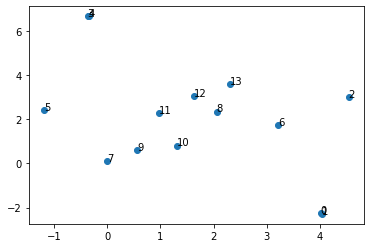

In [ ]:
# TSNE visualization, with node id on

event_emb  = embed.nodes_embeddings.weight.data.numpy()
tsne_emb = TSNE(n_components = 2, perplexity = 5, learning_rate = 10).fit_transform(event_emb)

plt.scatter(tsne_emb[:,0], tsne_emb[:,1])
for i in range(len(tsne_emb)):
    plt.annotate(str(i), xy=(tsne_emb[i,0], tsne_emb[i,1]))
plt.show()



In [ ]:
event_emb.shape

(14, 8)

In [ ]:
train_emb = np.zeros((X_train.shape[0], event_emb.shape[1]))
for i,seq in enumerate(X_train):
  translated_seq = [node_to_ind[e] for e in seq]
  for ind in translated_seq:
    #print(ind)
    train_emb[i] += event_emb[ind]
  

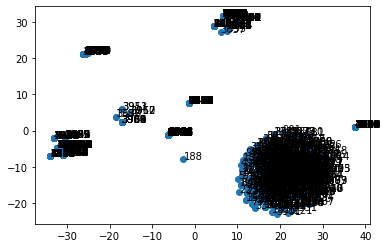

In [ ]:
tsne_emb = TSNE(n_components = 2, perplexity = 5, learning_rate = 10).fit_transform(train_emb)

plt.scatter(tsne_emb[:,0], tsne_emb[:,1])
for i in range(len(tsne_emb)):
   plt.annotate(str(i), xy=(tsne_emb[i,0], tsne_emb[i,1]))
plt.show()



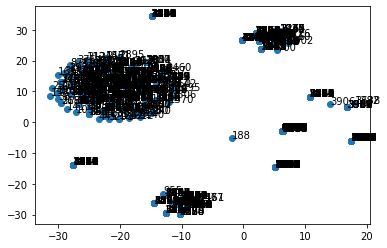

In [ ]:
tsne_emb = TSNE(n_components = 2, perplexity = 5, learning_rate = 10).fit_transform(train_emb)

plt.scatter(tsne_emb[:,0], tsne_emb[:,1])
for i in range(len(tsne_emb)):
   plt.annotate(str(i), xy=(tsne_emb[i,0], tsne_emb[i,1]))
plt.show()



In [ ]:
tsne_emb.shape

(3969, 2)

#### choice of number of clusters

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
for i in range(2, 10):
  print("===================")
  print(i)
  n_clusters = i
  gm = GaussianMixture(n_components=n_clusters, random_state=0).fit(train_emb)
  train_preds = []

  for emb in train_emb:
    train_preds.append(gm.predict(emb.reshape(1, -1)))
  
  train_preds = np.array(train_preds)

  for i in range(n_clusters):
    print(i, sum(train_preds == i), np.sum(y_train[(train_preds == i).ravel()]))

2
0 [3967] 155
1 [2] 1
3
0 [3910] 99
1 [2] 1
2 [57] 56
4
0 [3910] 99
1 [2] 1
2 [27] 27
3 [30] 29
5
0 [3910] 99
1 [1] 0
2 [27] 27
3 [30] 29
4 [1] 1
6
0 [2644] 79
1 [1] 0
2 [27] 27
3 [520] 37
4 [1] 1
5 [776] 12
7
0 [2644] 79
1 [1] 0
2 [27] 27
3 [249] 6
4 [1] 1
5 [776] 12
6 [271] 31
8
0 [2644] 79
1 [1] 0
2 [249] 6
3 [776] 12
4 [242] 2
5 [1] 1
6 [27] 27
7 [29] 29
9
0 [2644] 79
1 [1] 0
2 [249] 6
3 [776] 12
4 [242] 2
5 [1] 1
6 [27] 27
7 [28] 28
8 [1] 1


In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
for i in range(2, 10):
  print("===================")
  print(i)
  n_clusters = i
  gm = GaussianMixture(n_components=n_clusters, random_state=0).fit(train_emb)
  train_preds = []

  for emb in train_emb:
    train_preds.append(gm.predict(emb.reshape(1, -1)))
  
  train_preds = np.array(train_preds)

  for i in range(n_clusters):
    print(i, sum(train_preds == i), np.sum(y_train[(train_preds == i).ravel()]))

2
0 [7530] 235
1 [876] 229
3
0 [6748] 209
1 [438] 204
2 [1220] 51
4
0 [6748] 209
1 [429] 198
2 [800] 27
3 [429] 30
5
0 [4598] 148
1 [429] 198
2 [800] 27
3 [429] 30
4 [2150] 61
6
0 [4598] 148
1 [427] 197
2 [800] 27
3 [191] 29
4 [2150] 61
5 [240] 2
7
0 [4598] 148
1 [359] 193
2 [786] 22
3 [169] 16
4 [2150] 61
5 [239] 2
6 [105] 22
8
0 [5825] 191
1 [359] 193
2 [331] 19
3 [240] 2
4 [923] 18
5 [470] 8
6 [87] 15
7 [171] 18
9
0 [2092] 66
1 [359] 193
2 [331] 19
3 [240] 2
4 [3390] 105
5 [470] 8
6 [87] 15
7 [171] 18
8 [1266] 38


### Current GMM choice

In [ ]:
# class my_log_cluster(object):
#   def __init__(self, X_train, y_train, )

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture

n_clusters = 4
gm = GaussianMixture(n_components=n_clusters, random_state=0).fit(train_emb)
gm.means_

array([[  1.13262641,   0.77877632,  -0.77721808,  -0.91159825,
          1.07506107,   0.78467635,  -0.79164584,   0.7107787 ],
       [ -1.33860078,  -0.3664482 ,   0.23314337,   0.4661242 ,
         -1.3368288 ,  -0.34081887,   0.512485  ,  -0.39541302],
       [ -0.89097168,   0.0416817 ,  -0.18797426,   0.11807917,
         -1.00578292,   0.20815669,   0.06959351,  -0.02026341],
       [-12.02668387,   6.55967451,   4.82184162,  -3.03855443,
         -3.6225643 ,  11.07288288,  -6.88654447,   1.86690581]])

In [ ]:
all_emb = np.concatenate((train_emb, gm.means_), axis = 0)
all_emb.shape, train_emb.shape

((3981, 8), (3969, 8))

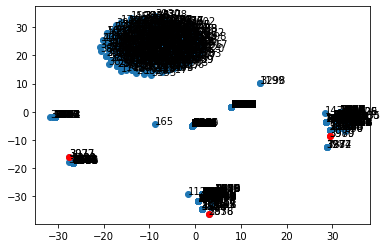

In [ ]:

tsne_emb = TSNE(n_components = 2, perplexity = 5, learning_rate = 10).fit_transform(all_emb)

plt.scatter(tsne_emb[:-n_clusters,0], tsne_emb[:-n_clusters,1])
plt.scatter(tsne_emb[-n_clusters:,0], tsne_emb[-n_clusters:,1], c = "r")
for i in range(len(tsne_emb)):
   plt.annotate(str(i), xy=(tsne_emb[i,0], tsne_emb[i,1]))
plt.show()



In [ ]:
train_preds = []

for emb in train_emb:
  train_preds.append(gm.predict(emb.reshape(1, -1)))

train_preds = np.array(train_preds)


In [ ]:
c_labels = []
for i in range(n_clusters):
  cluster_ones = np.sum(y_train[(train_preds == i).ravel()])
  cluster_size = np.sum(train_preds == i)
  c_labels.append(round(cluster_ones/cluster_size))
  print(i, sum(train_preds == i), np.sum(y_train[(train_preds == i).ravel()]))

0 [3910] 99
1 [2] 1
2 [27] 27
3 [30] 29


In [ ]:
### Cluster labels
# c_labels = [0, 0, 1, 1]
c_labels

[0, 0, 1, 1]

### Test pred (Seq-based)

In [ ]:
test_emb = np.zeros((X_test.shape[0], event_emb.shape[1]))
for i,seq in enumerate(X_test):
  translated_seq = []
  for e in seq:
    if e in node_to_ind:
      translated_seq.append(node_to_ind[e])
  for ind in translated_seq:
    #print(ind)
    test_emb[i] += event_emb[ind]
  

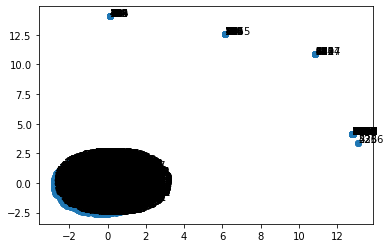

In [ ]:
tsne_emb = TSNE(n_components = 2, perplexity = 5, learning_rate = 10).fit_transform(test_emb)

plt.scatter(tsne_emb[:,0], tsne_emb[:,1])
for i in range(len(tsne_emb)):
    plt.annotate(str(i), xy=(tsne_emb[i,0], tsne_emb[i,1]))
plt.show()



In [ ]:
cluster_means = gm.means_
test_pred = []
test_min_dists = []
for emb in test_emb:
  dists = (emb - gm.means_)
  dists = np.apply_along_axis(np.linalg.norm, 1, dists)
  test_min_dists.append(np.min(dists))
  test_pred.append(c_labels[gm.predict(emb[np.newaxis, :])[0]])



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3814
           1       0.97      0.55      0.70       157

    accuracy                           0.98      3971
   macro avg       0.97      0.78      0.85      3971
weighted avg       0.98      0.98      0.98      3971



In [ ]:
lenth = []
for _ in X_train[y_train == 0]:
  if len(_) == 249:
    continue
  lenth.append(len(_))

max(lenth)

16

In [ ]:
# Check if embedding differs between non anomaly and anomaly data for each cluster
# Answer: NOPE, THAT DID NOT HAPPEN (ㆆ_ㆆ)
# 0 [1267] 20
# 1 [2644] 79
# 2 [56] 56
# 3 [2] 1

for i in range(4):
  dist_0 = train_emb[(y_train == 0) & (train_preds == i).ravel()] - gm.means_[0:1]
  if dist_0.shape[0] == 0:
    continue
  dist_0 = np.apply_along_axis(np.linalg.norm, 1, dist_0)
  dist_0 = np.mean(dist_0)
  dist_1 = train_emb[(y_train == 1) & (train_preds == i).ravel()] - gm.means_[0:1]
  dist_1 = np.apply_along_axis(np.linalg.norm, 1, dist_1)
  dist_1 = np.mean(dist_1)
  print(f"cluster {i+1} dists: [{dist_0} , {dist_1}]")

cluster 1 dists: [0.38008069792989824 , 0.3298800497915396]
cluster 2 dists: [0.8454917138739173 , 0.845491713873917]
cluster 4 dists: [22.542668452093633 , 21.752809830753552]


### Pred Sess-based

In [ ]:
# Session-based
(X_train, window_y_train, y_train), (X_test, window_y_test, y_test) = dataloader.load_HDFS(struct_log, 
                                                                                           label_file=label_file, window='session', 
                                                                                           window_size=window_size, 
                                                                                           train_ratio=train_ratio, split_type='uniform')

====== Input data summary ======
Loading /content/drive/MyDrive/CS 247/Project/loglizer/data/HDFS/HDFS_100k.log_structured.csv
62 251
Slicing 1587 sessions, with window 10
Slicing done, 8406 windows generated
Slicing 6353 sessions, with window 10
Slicing done, 25807 windows generated
Train: 8406 windows (464/8406 anomaly), 7942/8406 normal
Test: 25807 windows (842/25807 anomaly), 24965/25807 normal


In [ ]:
n_epochs = 100
neg_size = 5
n_batches = 3
batch_size = 5
#degree = get_degree(X_train, window_size= 1)
degree = get_degree(X_train.EventSequence.values, window_size= 1)

In [ ]:
# training
node_to_ind = {x:i for i,x in enumerate(degree.keys())}
embed = Embedding(len(degree), embed_dim=8)
opt = optim.Adam(embed.parameters())
 
for epoch in range(n_epochs):
    for b in trange(n_batches):
        opt.zero_grad()
        edge_idx = np.random.choice(len(X_train), batch_size)
        samplededges = create_edges(X_train.EventSequence[edge_idx])
        
        batch = list(makeData(samplededges, neg_size, degree))
        recoded_batch = []
        for seq in batch:
          recoded_batch.append([node_to_ind[e] for e in seq])

        batch = torch.LongTensor(recoded_batch)
        
        # based on the generated batch, train LINE via minimizing the loss.
        v_i = batch[:,0]
        v_j = batch[:,1]
        negsamples =  batch[:,2:]
        loss = embed.loss(v_i, v_j, negsamples)
        loss.backward()
        opt.step()


100%|██████████| 3/3 [00:00<00:00, 73.15it/s]


In [ ]:
from tqdm.auto import tqdm as tqdm_nb, trange as trange_nb
from collections import Counter

In [ ]:
sess_counts = Counter(X_train.SessionId)

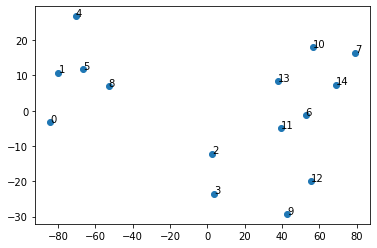

In [ ]:
# TSNE visualization, with node id on

event_emb  = embed.nodes_embeddings.weight.data.numpy()
tsne_emb = TSNE(n_components = 2, perplexity = 5, learning_rate = 10).fit_transform(event_emb)

plt.scatter(tsne_emb[:,0], tsne_emb[:,1])
for i in range(len(tsne_emb)):
    plt.annotate(str(i), xy=(tsne_emb[i,0], tsne_emb[i,1]))
plt.show()



In [ ]:
# #session-based embedding -- pure addition

# sess_emb = np.zeros((len(set(X_train.SessionId)), event_emb.shape[1]))
# for i,sess in enumerate(tqdm_nb(X_train.SessionId.drop_duplicates())):
#   sess_df = X_train[X_train.SessionId == sess]
#   for j,seq in enumerate(sess_df.EventSequence):
#     translated_seq = [node_to_ind[e] for e in seq]
#     for ind in translated_seq:
#       sess_emb[i] += event_emb[ind]

In [ ]:
#session-based embedding -- save only 1 most anomaly like one for anomaly sessions

sess_emb = np.zeros((len(set(X_train.SessionId)), event_emb.shape[1]))
for i,sess in enumerate(tqdm_nb(X_train.SessionId.drop_duplicates())):
  
  sess_df = X_train[X_train.SessionId == sess]
  ################
  if sess_df.shape[0] == 1 and y_train[i] == 1:
    raise ValueError(f"Session {i} with only 1 seq detected!")
  ################
  if y_train[i]: #i.e. anomaly
    curr_sess_embs = np.zeros((len(sess_df), event_emb.shape[1]))
    for j,seq in enumerate(sess_df.EventSequence):
      translated_seq = [node_to_ind[e] for e in seq]
      for ind in translated_seq:
        curr_sess_embs[j] += event_emb[ind]
    norm_from_mean = np.linalg.norm(curr_sess_embs - np.mean(curr_sess_embs, axis= 0)[np.newaxis, :], axis = 1)
    sess_emb[i] = curr_sess_embs[np.argmax(norm_from_mean)]
  ################
  else: #normal data
    curr_sess_embs = np.zeros((len(sess_df), event_emb.shape[1]))
    for j,seq in enumerate(sess_df.EventSequence):
      translated_seq = [node_to_ind[e] for e in seq]
      for ind in translated_seq:
        curr_sess_embs[j] += event_emb[ind]
    sess_emb[i] = np.mean(curr_sess_embs, axis = 0)

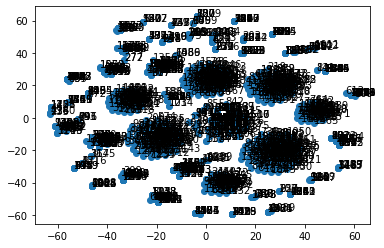

In [ ]:
tsne_emb = TSNE(n_components = 2, perplexity = 5, learning_rate = 10).fit_transform(sess_emb)

plt.scatter(tsne_emb[:,0], tsne_emb[:,1])
for i in range(len(tsne_emb)):
    plt.annotate(str(i), xy=(tsne_emb[i,0], tsne_emb[i,1]))
plt.show()

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture


In [ ]:
n_clusters = 12
gm = GaussianMixture(n_components=n_clusters, random_state=0).fit(sess_emb)
gm.means_



array([[-0.95661751, -0.80339519,  0.7898886 ,  0.66230348,  0.96703211,
        -0.64205104,  0.9054343 ,  1.08048494],
       [-1.15962121, -1.0888775 ,  1.04650557,  0.95274871,  1.2572634 ,
        -1.15705134,  1.16088498,  1.25915741],
       [ 0.42724919,  0.19246183, -0.42343041, -0.50593925, -0.28621215,
        -0.61983764, -0.2989805 , -0.31010459],
       [-0.6986794 , -0.60969297,  0.52836486,  0.42117845,  0.75594966,
        -0.71521789,  0.66420506,  0.87069063],
       [-0.1508685 ,  0.1904938 , -0.14589266, -0.37789537, -0.13619846,
         0.91113735, -0.02391033,  0.2817799 ],
       [-0.86740848, -1.22538491,  1.08698514,  1.05592836,  1.12807218,
        -2.07951439,  1.13047521,  0.68607775],
       [-1.08441047, -0.96979069,  0.9431669 ,  0.83508313,  1.14418172,
        -0.92110608,  1.06283194,  1.206362  ],
       [-1.08700597, -1.10715025,  1.03701885,  0.95842354,  1.23292561,
        -1.36403745,  1.13924115,  1.14751881],
       [ 1.99796682,  2.34613828

In [ ]:
sess_y_train = []
ind = 0
for key, item in sess_counts.items():
  count = 0
  while count < item - 1:
    count += 1
    continue
  sess_y_train.append(y_train[ind])
  ind += item

sess_y_train = np.array(sess_y_train)
print(sess_y_train.shape)

(1587,)


In [ ]:
train_preds = []

for emb in sess_emb:
  train_preds.append(gm.predict(emb.reshape(1, -1)))

train_preds = np.array(train_preds)
for i in range(n_clusters):
  print(i, sum(train_preds == i), np.sum(sess_y_train[(train_preds == i).ravel()]))


0 [235] 0
1 [360] 5
2 [6] 1
3 [177] 12
4 [8] 0
5 [30] 2
6 [200] 7
7 [501] 25
8 [1] 0
9 [5] 5
10 [59] 5
11 [5] 0


In [ ]:
### Cluster labels
c_labels = [0, 0, 1, 1]

In [ ]:
from itertools import chain

In [ ]:
#session-based embedding -- select anomaly embedding --> failed approach

test_emb = np.zeros((len(set(X_test.SessionId)), sess_emb.shape[1]))
for i,sess in enumerate(tqdm_nb(X_test.SessionId.drop_duplicates())):
  sess_df = X_test[X_test.SessionId == sess]
  curr_sess_embs = np.zeros((len(sess_df), sess_emb.shape[1]))
  for j,seq in enumerate(sess_df.EventSequence):
    pad_code = node_to_ind["#Pad"]
    translated_seq = [node_to_ind.get(e, pad_code) for e in seq]
    for ind in translated_seq:
      curr_sess_embs[j] += event_emb[ind]
    norm_from_mean = np.linalg.norm(curr_sess_embs - np.mean(curr_sess_embs, axis= 0)[np.newaxis, :], axis = 1)
    test_emb[i] = curr_sess_embs[np.argmax(norm_from_mean)]



In [ ]:
#session-based embedding -- avereage 

test_emb = np.zeros((len(set(X_test.SessionId)), sess_emb.shape[1]))
for i,sess in enumerate(tqdm_nb(X_test.SessionId.drop_duplicates())):
  sess_df = X_test[X_test.SessionId == sess]
  seq = sess_df.EventSequence.explode().tolist()
  translated_seq = [node_to_ind.get(e, 6) for e in seq]
  for ind in translated_seq:
    test_emb[i] += event_emb[ind]
  test_emb[i] /= len(sess_df)

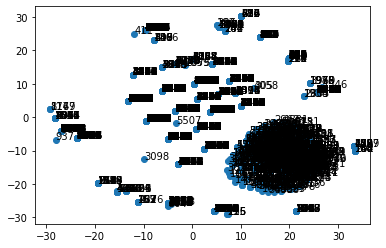

In [ ]:
tsne_emb = TSNE(n_components = 2, perplexity = 5, learning_rate = 10).fit_transform(test_emb)

plt.scatter(tsne_emb[:,0], tsne_emb[:,1])
for i in range(len(tsne_emb)):
    plt.annotate(str(i), xy=(tsne_emb[i,0], tsne_emb[i,1]))
plt.show()



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
np.argmax(abs(cosine_similarity(gm.means_, test_emb[0:1])))

2

In [ ]:
sess_y_test[0]

1

In [ ]:
test_emb

array([[ 0.42724919,  0.19246183, -0.42343041, ..., -0.61983764,
        -0.2989805 , -0.31010459],
       [-0.26609144, -0.53830723,  0.31578952, ..., -1.46724492,
         0.41612935,  0.19016757],
       [ 0.97269917,  0.02762042, -0.02444842, ..., -0.00784997,
        -0.99900126, -0.81391919],
       ...,
       [-1.28064433, -0.98245797,  0.96167976, ..., -0.74598303,
         1.17749602,  1.60296071],
       [ 0.42724919,  0.19246183, -0.42343041, ..., -0.61983764,
        -0.2989805 , -0.31010459],
       [ 0.42724919,  0.19246183, -0.42343041, ..., -0.61983764,
        -0.2989805 , -0.31010459]])

In [ ]:
import pandas as pd
df = pd.DataFrame(test_emb, columns = ['A', 'B', 'C', 'D', "E", 'F', 'G', 'H'])
df.drop_duplicates()

,A,B,C,D,E,F,G,H
0,0.427249,0.192462,-0.423430,-0.505939,-0.286212,-0.619838,-0.298981,-0.310105
1,-0.266091,-0.538307,0.315790,0.255812,0.407640,-1.467245,0.416129,0.190168
2,0.972699,0.027620,-0.024448,-1.141910,-1.130936,-0.007850,-0.999001,-0.813919
3,1.324882,0.456292,-0.528805,-1.321072,-1.414112,-0.083104,-1.272509,-1.203069
5,-0.860956,-1.225342,1.082046,1.044500,1.120388,-2.092139,1.128588,0.679246
12,-1.280644,-0.982458,0.961680,0.862216,1.294358,-0.745983,1.177496,1.602961
31,0.328773,0.148727,-0.450467,-0.532875,-0.305108,-0.842351,-0.296329,-0.298911
90,-1.450433,-1.015857,1.084781,0.930159,1.355168,-0.327916,1.247162,1.705851
138,1.516443,1.383180,-1.651341,-1.734143,-1.447391,0.422354,-1.464199,-1.201985
144,2.369034,1.846605,-2.146200,-2.643802,-2.439514,1.038586,-2.339387,-1.975386


In [ ]:
test_emb.shape

(6353, 8)

In [ ]:
test_emb[-1]

array([ 0.42724919,  0.19246183, -0.42343041, -0.50593925, -0.28621215,
       -0.61983764, -0.2989805 , -0.31010459])

In [ ]:
emb = test_emb[-1]
np.linalg.norm(gm.means_ - emb[np.newaxis, :], axis = 1)

array([3.27096641e+00, 3.96398490e+00, 3.55444798e-16, 2.66342475e+00,
       1.79444303e+00, 3.94636449e+00, 3.68685075e+00, 3.91330948e+00,
       5.00011734e+00, 1.59650146e+00, 3.43832639e+00, 2.74686482e+00])

In [ ]:
np.linalg.norm(gm.means_ - emb[np.newaxis, :], axis = 1)

array([3.27096641e+00, 3.96398490e+00, 3.55444798e-16, 2.66342475e+00,
       1.79444303e+00, 3.94636449e+00, 3.68685075e+00, 3.91330948e+00,
       5.00011734e+00, 1.59650146e+00, 3.43832639e+00, 2.74686482e+00])

In [ ]:
test_pred = []
for emb in test_emb:
  #sims = abs(cosine_similarity(gm.means_, emb[np.newaxis, :]))
  norms = np.linalg.norm(gm.means_ - emb[np.newaxis, :], )
  if max(norms) < 0.5:
    print("oh")
  #np.argmax(sims)
  #test_pred.append()

len(test_pred)

0

In [ ]:
sess_y_test = []
ind = 0
test_counts = Counter(X_test.SessionId)
for key, item in test_counts.items():
  count = 0
  while count < item - 1:
    count += 1
    continue
  sess_y_test.append(y_test[ind])
  ind += item

sess_y_test = np.array(sess_y_test)
print(sess_y_test.shape)

(6353,)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(sess_y_test, test_pred))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      6102
           1       0.80      0.02      0.03       251
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0

    accuracy                           0.63      6353
   macro avg       0.18      0.07      0.08      6353
weighted avg       0.97      0.63      0.76      6353



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for i in range(test_emb.shape[0]):
  if np.argmax(gm.predict_proba(test_emb[i:i+1])) != 2:
    print(i)
  #gm.predict_proba(test_emb[i:i+1])

In [ ]:
cluster_means = gm.means_
test_pred = []
test_min_dists = []
for emb in test_emb:
  dists = (emb - gm.means_)
  dists = np.apply_along_axis(np.linalg.norm, 1, dists)
  test_min_dists.append(np.min(dists))
  test_pred.append(c_labels[gm.predict(emb[np.newaxis, :])[0]])



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3814
           1       0.99      0.43      0.60       157

    accuracy                           0.98      3971
   macro avg       0.98      0.71      0.79      3971
weighted avg       0.98      0.98      0.97      3971



In [ ]:
# 0 [1267] 20
# 1 [2644] 79
# 2 [56] 56
# 3 [2] 1

for i in range(4):
  dist_0 = train_emb[(y_train == 0) & (train_preds == i).ravel()] - gm.means_[0:1]
  if dist_0.shape[0] == 0:
    continue
  dist_0 = np.apply_along_axis(np.linalg.norm, 1, dist_0)
  dist_0 = np.mean(dist_0)
  dist_1 = train_emb[(y_train == 1) & (train_preds == i).ravel()] - gm.means_[0:1]
  dist_1 = np.apply_along_axis(np.linalg.norm, 1, dist_1)
  dist_1 = np.mean(dist_1)
  print(f"cluster {i+1} dists: [{dist_0} , {dist_1}]")

cluster 1 dists: [0.38008069792989824 , 0.3298800497915396]
cluster 2 dists: [0.8454917138739173 , 0.845491713873917]
cluster 4 dists: [22.542668452093633 , 21.752809830753552]


In [ ]:
# X_train[np.arange(train_emb.shape[0])[(train_preds == 0).ravel() & (y_train == 1).ravel()]] #similar embeddings

### NU-log

In [ ]:
#!/usr/bin/env python
# coding: utf-8
import hashlib
import os

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math, copy, time
from torch.autograd import Variable
import pandas as pd
import re
from tqdm import trange
import random

from keras.preprocessing.sequence import pad_sequences
from collections import defaultdict
from sklearn.preprocessing import minmax_scale
from torch.utils.data import Dataset, DataLoader

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler, WeightedRandomSampler
from torchvision import transforms, utils


class EncoderDecoder(nn.Module):
    """
    A standard Encoder-Decoder architecture. Base for this and many
    other models.
    """

    def __init__(self, encoder, decoder, src_embed, tgt_embed, generator):
        super(EncoderDecoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.src_embed = src_embed
        self.tgt_embed = tgt_embed
        self.generator = generator

    def forward(self, src, tgt, src_mask, tgt_mask):
        "Take in and process masked src and target sequences."
        #         return self.decode(self.encode(src, src_mask), src_mask,
        #                             tgt, tgt_mask)
        out = self.encode(src, src_mask)
        return out

    def encode(self, src, src_mask):
        return self.encoder(self.src_embed(src), src_mask)

    def decode(self, memory, src_mask, tgt, tgt_mask):
        return self.decoder(self.tgt_embed(tgt), memory, src_mask, tgt_mask)

class Generator(nn.Module):
    "Define standard linear + softmax generation step."

    def __init__(self, d_model, vocab):
        super(Generator, self).__init__()
        self.d_model = d_model
        self.proj = nn.Linear(self.d_model, vocab)

    def forward(self, x):
        out = self.proj(x[:, 0, :])
        return out

def clones(module, N):
    "Produce N identical layers."
    return nn.ModuleList([copy.deepcopy(module) for _ in range(N)])

class Encoder(nn.Module):
    "Core encoder is a stack of N layers"
    def __init__(self, layer, N):
        super(Encoder, self).__init__()
        self.layers = clones(layer, N)
        self.norm = LayerNorm(layer.size)

    def forward(self, x, mask):
        "Pass the input (and mask) through each layer in turn."
        for layer in self.layers:
            x = layer(x, mask)
        return self.norm(x)


class LayerNorm(nn.Module):
    "Construct a layernorm module (See citation for details)."

    def __init__(self, features, eps=1e-6):
        super(LayerNorm, self).__init__()
        self.a_2 = nn.Parameter(torch.ones(features))
        self.b_2 = nn.Parameter(torch.zeros(features))
        self.eps = eps

    def forward(self, x):
        mean = x.mean(-1, keepdim=True)
        std = x.std(-1, keepdim=True)
        return self.a_2 * (x - mean) / (std + self.eps) + self.b_2



class SublayerConnection(nn.Module):
    """
    A residual connection followed by a layer norm.
    Note for code simplicity the norm is first as opposed to last.
    """

    def __init__(self, size, dropout):
        super(SublayerConnection, self).__init__()
        self.norm = LayerNorm(size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, sublayer):
        "Apply residual connection to any sublayer with the same size."
        return self.norm(x + self.dropout(sublayer(x)))



class EncoderLayer(nn.Module):
    "Encoder is made up of self-attn and feed forward (defined below)"

    def __init__(self, size, self_attn, feed_forward, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attn = self_attn
        self.feed_forward = feed_forward
        self.sublayer = clones(SublayerConnection(size, dropout), 2)
        self.size = size

    def forward(self, x, mask):
        "Follow Figure 1 (left) for connections."
        x = self.sublayer[0](x, lambda x: self.self_attn(x, x, x, mask))
        return self.sublayer[1](x, self.feed_forward)




class Decoder(nn.Module):
    "Generic N layer decoder with masking."

    def __init__(self, layer, N):
        super(Decoder, self).__init__()
        self.layers = clones(layer, N)
        self.norm = LayerNorm(layer.size)

    def forward(self, x, memory, src_mask, tgt_mask):
        for layer in self.layers:
            x = layer(x, memory, src_mask, tgt_mask)
        return self.norm(x)



class DecoderLayer(nn.Module):
    "Decoder is made of self-attn, src-attn, and feed forward (defined below)"

    def __init__(self, size, self_attn, src_attn, feed_forward, dropout):
        super(DecoderLayer, self).__init__()
        self.size = size
        self.self_attn = self_attn
        self.src_attn = src_attn
        self.feed_forward = feed_forward
        self.sublayer = clones(SublayerConnection(size, dropout), 3)

    def forward(self, x, memory, src_mask, tgt_mask):
        "Follow Figure 1 (right) for connections."
        m = memory
        x = self.sublayer[0](x, lambda x: self.self_attn(x, x, x, tgt_mask))
        x = self.sublayer[1](x, lambda x: self.src_attn(x, m, m, src_mask))
        return self.sublayer[2](x, self.feed_forward)

def subsequent_mask(size):
    "Mask out subsequent positions."
    attn_shape = (1, size, size)
    subsequent_mask = np.triu(np.ones(attn_shape), k=1).astype('uint8')
    return torch.from_numpy(subsequent_mask) == 0


def attention(query, key, value, mask=None, dropout=None):
    "Compute 'Scaled Dot Product Attention'"
    d_k = query.size(-1)
    scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)
    if mask is not None:
        scores = scores.masked_fill(mask == 0, -1e9)
    p_attn = F.softmax(scores, dim=-1)
    if dropout is not None:
        p_attn = dropout(p_attn)
    return torch.matmul(p_attn, value), p_attn


class MultiHeadedAttention(nn.Module):
    def __init__(self, h, d_model, dropout=0.1):
        "Take in model size and number of heads."
        super(MultiHeadedAttention, self).__init__()
        assert d_model % h == 0
        # We assume d_v always equals d_k
        self.d_k = d_model // h
        self.h = h
        self.linears = clones(nn.Linear(d_model, d_model), 4)
        self.attn = None
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, query, key, value, mask=None):
        "Implements Figure 2"
        if mask is not None:
            # Same mask applied to all h heads.
            mask = mask.unsqueeze(1)
        nbatches = query.size(0)

        # 1) Do all the linear projections in batch from d_model => h x d_k
        query, key, value = [l(x).view(nbatches, -1, self.h, self.d_k).transpose(1, 2)
                             for l, x in zip(self.linears, (query, key, value))]

        # 2) Apply attention on all the projected vectors in batch.
        x, self.attn = attention(query, key, value, mask=mask,
                                 dropout=self.dropout)

        # 3) "Concat" using a view and apply a final linear.
        x = x.transpose(1, 2).contiguous().view(nbatches, -1, self.h * self.d_k)
        return self.linears[-1](x)


class PositionwiseFeedForward(nn.Module):
    "Implements FFN equation."

    def __init__(self, d_model, d_ff, dropout=0.1):
        super(PositionwiseFeedForward, self).__init__()
        self.w_1 = nn.Linear(d_model, d_ff)
        self.w_2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        return self.w_2(self.dropout(F.relu(self.w_1(x))))


class Embeddings(nn.Module):
    def __init__(self, d_model, vocab):
        super(Embeddings, self).__init__()
        self.lut = nn.Embedding(vocab, d_model)
        self.d_model = d_model

    def forward(self, x):
        return self.lut(x) * math.sqrt(self.d_model)


class PositionalEncoding(nn.Module):
    "Implement the PE function."

    def __init__(self, d_model, dropout, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) *
                             -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + Variable(self.pe[:, :x.size(1)],
                         requires_grad=False)
        return self.dropout(x)



class Batch:
    "Object for holding a batch of data with mask during training."

    def __init__(self, src, trg=None, pad=0):
        self.src = src
        self.src_mask = (src != pad).unsqueeze(-2)
        if trg is not None:
            self.trg = trg
            self.trg_y = trg
            self.trg_mask = self.make_std_mask(self.trg, pad)
            self.ntokens = (self.trg_y != pad).data.sum()

    @staticmethod
    def make_std_mask(tgt, pad):
        "Create a mask to hide padding and future words."
        tgt_mask = (tgt != pad).unsqueeze(-2)
        tgt_mask = tgt_mask & Variable(
            subsequent_mask(tgt.size(-1)).type_as(tgt_mask.data))
        return tgt_mask


class LogTokenizer:
    def __init__(self, filters='([ |:|\(|\)|=|,])|(core.)|(\.{2,})'):
        self.filters = filters
        self.word2index = {'<PAD>': 0, '<CLS>': 1, '<MASK>': 2}
        self.index2word = {0: '<PAD>', 1: '<CLS>', 2: '<MASK>'}
        self.n_words = 3  # Count SOS and EOS

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.index2word[self.n_words] = word
            self.n_words += 1

    def tokenize(self, sent):
        sent = sent.replace('\'', '')
        filtered = re.split(self.filters, sent)
        new_filtered = []
        for f in filtered:
            if f != None and f != '':
                new_filtered.append(f)
        for w in range(len(new_filtered)):
            self.addWord(new_filtered[w])
            new_filtered[w] = self.word2index[new_filtered[w]]
        return new_filtered

class MaskedDataset(Dataset):

    def __init__(self, data, tokenizer, mask_percentage=0.2, transforms=None, pad=0, pad_len=64):
        self.c = copy.deepcopy

        self.data = data
        self.padded_data = self._get_padded_data(data, pad_len)
        self.mask_percentage = mask_percentage
        self.transforms = transforms
        self.pad = pad
        self.pad_len = pad_len
        self.tokenizer = tokenizer

        self.token_id = self.tokenizer.tokenize('<MASK>')[0]

    def get_sample_weights(self):
        def changeTokenToCount(token, dictInfo):
            if token == 0:
                return 0
            else:
                return dictInfo[token]

        d = self.c(self.padded_data)
        data_token_idx_df = pd.DataFrame(d)
        storeColumnInfo = defaultdict(dict)
        cnt = 0
        for column in range(self.pad_len):
            val_cnt = pd.value_counts(data_token_idx_df.iloc[:, column])
            storeColumnInfo[column] = val_cnt.to_dict()
            data_token_idx_df.iloc[:, column] = data_token_idx_df.iloc[:, column].apply(
                lambda x: changeTokenToCount(x, storeColumnInfo[column]))
        #         weights = minmax_scale(np.divide(np.ones(data_token_idx_df.shape[0]),
        #                                          data_token_idx_df.sum(axis=1)),
        #                                feature_range=(0.005, 0.995))
        weights = 1 - minmax_scale(data_token_idx_df.sum(axis=1), feature_range=(0.0, 0.75))
        return weights

    @staticmethod
    def subsequent_mask(size, trg):
        "Mask out subsequent positions."
        attn_shape = (size, size)
        subsequent_mask = np.triu(np.ones(attn_shape), k=1).astype('uint8')
        t = torch.from_numpy(subsequent_mask) == 0

        return t & trg

    def make_std_mask(self, trg):
        "Create a mask to hide padding and future words."
        trg_mask = (trg != self.pad)
        trg_mask = self.subsequent_mask(trg.shape[0], trg_mask)
        return trg_mask

    def _get_padded_data(self, data, pad_len):
        d = self.c(data)
        pd = pad_sequences(d, maxlen=pad_len, dtype="long",
                           truncating="post", padding="post")
        return pd

    def __getitem__(self, index):
        masked_data = self.c(self.padded_data[index])
        # print(masked_data)
        src = self.padded_data[index]

        offset = 1
        data_len = len(self.data[index]) - 1 if len(self.data[index]) < self.pad_len else self.pad_len - 1

        return src, offset, data_len, index

    def __len__(self):
        return self.padded_data.shape[0]


class SimpleLossCompute:
    "A simple loss compute and train function."

    def __init__(self, generator, criterion, opt=None, is_test=False):
        self.generator = generator
        self.criterion = criterion
        self.opt = opt
        self.is_test = is_test

    def __call__(self, x, y, norm):
        x = self.generator(x)
        y = y.reshape(-1)
        loss = self.criterion(x, y)
        if not self.is_test:
            loss.backward()
            if self.opt is not None:
                self.opt.step()
                #                 self.opt.optimizer.zero_grad()
                self.opt.zero_grad()

        return loss.item() * norm


class LogParser:
    def __init__(self,indir, outdir, filters, k, log_format):
        self.path = indir
        self.logName = None
        self.savePath = outdir
        self.filters = filters
        self.k = k
        self.df_log = None
        self.log_format = log_format
        self.tokenizer = LogTokenizer(filters)

    def num_there(self, s):
        digits = [i.isdigit() for i in s]
        return True if np.mean(digits) >0.0 else False


    def parse(self, logName, batch_size=5, mask_percentage=1.0, pad_len=150, N=1, d_model=256,
              dropout=0.1,  lr=0.001, betas=(0.9, 0.999), weight_decay=0.005, nr_epochs=5, num_samples=0, step_size=10):
        self.logName = logName
        self.mask_percentage=mask_percentage
        self.pad_len = pad_len
        self.batch_size = batch_size
        self.N = N
        self.d_model = d_model
        self.dropout = dropout
        self.lr = lr
        self.betas = betas
        self.weight_decay = weight_decay
        self.num_samples = num_samples
        self.nr_epochs = nr_epochs
        self.step_size = step_size
        self.load_data()

        if not os.path.exists(self.savePath):
            os.makedirs(self.savePath)
            
        df_len = self.df_log.shape[0]
       
        data_tokenized = []

        for i in trange(0, df_len):
            tokenized = self.tokenizer.tokenize('<CLS> ' + self.df_log.iloc[i].Content)
            data_tokenized.append(tokenized)
           
        train_dataloader, test_dataloader = self.get_dataloaders(data_tokenized)

        criterion = nn.CrossEntropyLoss()
        model = self.make_model(self.tokenizer.n_words, self.tokenizer.n_words, N=self.N, d_model=self.d_model, d_ff=self.d_model,
                                dropout=self.dropout, max_len=self.pad_len)
        model.cuda()
        model_opt = torch.optim.Adam(model.parameters(), lr=self.lr, betas=self.betas, weight_decay=self.weight_decay)
       
        for epoch in range(self.nr_epochs):
            model.train()
            print("Epoch", epoch)
            self.run_epoch(train_dataloader, model,
                      SimpleLossCompute(model.generator, criterion, model_opt))
            torch.save(model.state_dict(), self.savePath + 'model_parser_' + self.logName + str(epoch) + '.pt')

        #model.load_state_dict(torch.load('./AttentionParserResult/model_parser_BGL_2k.log3.pt'))
        #model.cuda()
        results = self.run_test(test_dataloader, model,
                           SimpleLossCompute(model.generator, criterion, None, is_test=True))
        
        data_words = []
        indices_from = []

        for i, (x, y, ind) in enumerate(results):

            # print(ind)
            for j in range(len(x)):
                if not self.num_there(self.tokenizer.index2word[y[j]]):
                    if y[j] in x[j][-self.k:]:
                        data_words.append(self.tokenizer.index2word[y[j]])
                    else:
                        data_words.append("<*>")
                else:
                    data_words.append("<*>")

            indices_from += ind.tolist()

        p = pd.DataFrame({"indices": indices_from, "predictions": data_words})
        p = p.groupby('indices')['predictions'].apply(list).reset_index()
  
        parsed_logs = []
        for i in p.predictions.values:
            parsed_logs.append(str(''.join(i)).strip())
       
        df_event = self.outputResult(parsed_logs)
        df_event.to_csv(self.savePath+self.logName+"_structured.csv", index=False)



    def get_dataloaders(self, data_tokenized):
        transform_to_tensor = transforms.Lambda(lambda lst: torch.tensor(lst))

        train_data = MaskedDataset(data_tokenized, self.tokenizer, mask_percentage=self.mask_percentage, transforms=transform_to_tensor, pad_len=self.pad_len)
        weights = train_data.get_sample_weights()
        if self.num_samples != 0:
            train_sampler = WeightedRandomSampler(weights=list(weights), num_samples=self.num_samples, replacement=True)
        if self.num_samples == 0:
            train_sampler = RandomSampler(train_data)
        train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=self.batch_size)

        test_data = MaskedDataset(data_tokenized, self.tokenizer, mask_percentage=self.mask_percentage, transforms=transform_to_tensor, pad_len=self.pad_len)
        test_sampler = SequentialSampler(test_data)
        test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=self.batch_size)
        return train_dataloader, test_dataloader


    def load_data(self):
        headers, regex = self.generate_logformat_regex(self.log_format)
        self.df_log = self.log_to_dataframe(os.path.join(self.path, self.logName), regex, headers, self.log_format)

        
    def log_to_dataframe(self, log_file, regex, headers, logformat):
        """ Function to transform log file to dataframe
        """
        log_messages = []
        linecount = 0
        with open(log_file, 'r') as fin:
            for line in fin.readlines():
                try:
                    match = regex.search(line.strip())
                    message = [match.group(header) for header in headers]
                    log_messages.append(message)
                    linecount += 1
                except Exception as e:
                    pass
        logdf = pd.DataFrame(log_messages, columns=headers)
        logdf.insert(0, 'LineId', None)
        logdf['LineId'] = [i + 1 for i in range(linecount)]
        return logdf

    def generate_logformat_regex(self, logformat):
        """ Function to generate regular expression to split log messages
        """
        headers = []
        splitters = re.split(r'(<[^<>]+>)', logformat)
        regex = ''
        for k in range(len(splitters)):
            if k % 2 == 0:
                splitter = re.sub(' +', '\\\s+', splitters[k])
                regex += splitter
            else:
                header = splitters[k].strip('<').strip('>')
                regex += '(?P<%s>.*?)' % header
                headers.append(header)
        regex = re.compile('^' + regex + '$')
        return headers, regex

    def do_mask(self, batch):
        c = copy.deepcopy
        token_id = self.tokenizer.tokenize('<MASK>')[0]
        srcs, offsets, data_lens, indices = batch
        src, trg, idxs = [], [], []

        for i, _ in enumerate(data_lens):
            data_len = c(data_lens[i].item())
            # print(data_lens[i].item())
            dg = c(indices[i].item())
            masked_data = c(srcs[i])
            offset = offsets[i].item()
            num_masks = round(self.mask_percentage * data_len)
            if self.mask_percentage < 1.0:
                masked_indices = np.random.choice(np.arange(offset, offset + data_len),
                                                  size=num_masks if num_masks > 0 else 1, replace=False)
            else:
                masked_indices = np.arange(offset, offset + data_len)

            masked_indices.sort()

            for j in masked_indices:
                tmp = c(masked_data)
                label_y = c(tmp[j])
                tmp[j] = token_id
                src.append(c(tmp))

                trg.append(label_y)
                idxs.append(dg)
        return torch.stack(src), torch.stack(trg), torch.Tensor(idxs)

    def run_epoch(self, dataloader, model, loss_compute):

        start = time.time()
        total_tokens = 0
        total_loss = 0
        tokens = 0
        for i, batch in enumerate(dataloader):

            b_input, b_labels, _ = self.do_mask(batch)
            batch = Batch(b_input, b_labels, 0)
          
            out = model.forward(batch.src.cuda(), batch.trg.cuda(),
                                batch.src_mask.cuda(), batch.trg_mask.cuda())
            # out[:, 0, :] => class token

            loss = loss_compute(out, batch.trg_y.cuda(), batch.ntokens)
            total_loss += loss
            total_tokens += batch.ntokens
            tokens += batch.ntokens

            if i % self.step_size == 1:
                elapsed = time.time() - start
                print("Epoch Step: %d / %d Loss: %f Tokens per Sec: %f" %
                      (i, len(dataloader), loss / batch.ntokens, tokens / elapsed))
                start = time.time()
                tokens = 0
        return total_loss / total_tokens

    def run_test(self, dataloader, model, loss_compute):
        model.eval()
        with torch.no_grad():
            for i, batch in enumerate(dataloader):
                b_input, b_labels, ind = self.do_mask(batch)

                batch = Batch(b_input, b_labels, 0)
                out = model.forward(batch.src.cuda(), batch.trg.cuda(),
                                    batch.src_mask.cuda(), batch.trg_mask.cuda())
                out_p = model.generator(out)  # batch_size, hidden_dim


                if i % self.step_size == 1:
                    print("Epoch Step: %d / %d" % (i, len(dataloader)))
                yield out_p.cpu().numpy().argsort(axis=1), b_labels.cpu().numpy(), ind.cpu()

    def outputResult(self, pred):
        df_events = []
        templateids = []
        for pr in pred:
            template_id = hashlib.md5(pr.encode('utf-8')).hexdigest()
            templateids.append(template_id)
            df_events.append([template_id, pr])

        df_event = pd.DataFrame(df_events, columns=['EventId', 'EventTemplate'])
        return df_event

    def make_model(self, src_vocab, tgt_vocab, N=3,
                   d_model=512, d_ff=2048, h=8, dropout=0.1, max_len=20):
        "Helper: Construct a model from hyperparameters."
        c = copy.deepcopy
        attn = MultiHeadedAttention(h, d_model)
        ff = PositionwiseFeedForward(d_model, d_ff, dropout)
        position = PositionalEncoding(d_model, dropout, max_len)
        model = EncoderDecoder(
            Encoder(EncoderLayer(d_model, c(attn), c(ff), dropout), N),
            Decoder(DecoderLayer(d_model, c(attn), c(attn), c(ff), dropout), N),
            nn.Sequential(Embeddings(d_model, src_vocab), c(position)),
            nn.Sequential(Embeddings(d_model, tgt_vocab), c(position)),
            Generator(d_model, tgt_vocab))

        # This was important from their code.
        # Initialize parameters with Glorot / fan_avg.
        for p in model.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform(p)
        return model